In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('home_prices.csv')

In [3]:
df.head()

,area_sqr_ft,bedrooms,color,price_lakhs
0,3774,2,Red,216
1,1460,3,Gray,88
2,1894,4,Gray,147
3,1730,2,Blue,84
4,1695,1,Blue,77


#Check Null values,Duplicates

In [22]:
df.isna().sum()

area_sqr_ft    0
bedrooms       0
color          0
price_lakhs    0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

#Statistical Calculation of numerical column

In [24]:
df.describe()   

,area_sqr_ft,bedrooms,price_lakhs
count,300.000000,300.000000,300.000000
mean,2371.990000,3.013333,148.050000
std,942.766953,1.446882,52.873113
min,601.000000,1.000000,15.000000
25%,1620.750000,2.000000,107.750000
50%,2342.500000,3.000000,151.000000
75%,3206.000000,4.000000,191.000000
max,3997.000000,5.000000,250.000000


#Color column is categorical so convert it into numerical.So we can Calculate Correlation

In [5]:
df['color'].unique()

array(['Red', 'Gray', 'Blue', 'Yellow', 'Green', 'White'], dtype=object)

In [7]:
data = pd.get_dummies(df,columns=['color'],dtype='int')

In [8]:
data.head()

,area_sqr_ft,bedrooms,price_lakhs,color_Blue,color_Gray,color_Green,color_Red,color_White,color_Yellow
0,3774,2,216,0,0,0,1,0,0
1,1460,3,88,0,1,0,0,0,0
2,1894,4,147,0,1,0,0,0,0
3,1730,2,84,1,0,0,0,0,0
4,1695,1,77,1,0,0,0,0,0


In [9]:
data.corr()

,area_sqr_ft,bedrooms,price_lakhs,color_Blue,color_Gray,color_Green,color_Red,color_White,color_Yellow
area_sqr_ft,1.000000,0.185810,0.945365,0.022498,-0.068944,-0.032012,0.059055,0.063827,-0.037819
bedrooms,0.185810,1.000000,0.439445,0.079767,0.040882,-0.120207,-0.004177,-0.023676,0.015286
price_lakhs,0.945365,0.439445,1.000000,0.034567,-0.040565,-0.041959,0.045803,0.051122,-0.046673
color_Blue,0.022498,0.079767,0.034567,1.000000,-0.239131,-0.196818,-0.212039,-0.189036,-0.199384
color_Gray,-0.068944,0.040882,-0.040565,-0.239131,1.000000,-0.214409,-0.230990,-0.205931,-0.217205
color_Green,-0.032012,-0.120207,-0.041959,-0.196818,-0.214409,1.000000,-0.190117,-0.169493,-0.178771
color_Red,0.059055,-0.004177,0.045803,-0.212039,-0.230990,-0.190117,1.000000,-0.182600,-0.192596
color_White,0.063827,-0.023676,0.051122,-0.189036,-0.205931,-0.169493,-0.182600,1.000000,-0.171703
color_Yellow,-0.037819,0.015286,-0.046673,-0.199384,-0.217205,-0.178771,-0.192596,-0.171703,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation Using Visualization

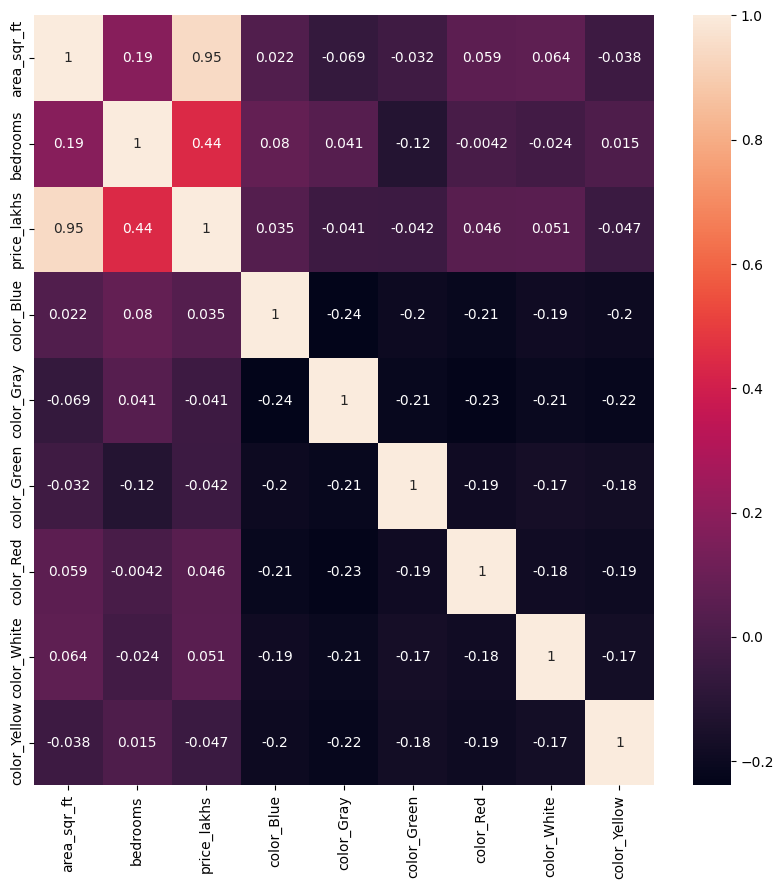

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
result = data.corr()

In [15]:
result['price_lakhs']

area_sqr_ft     0.945365
bedrooms        0.439445
price_lakhs     1.000000
color_Blue      0.034567
color_Gray     -0.040565
color_Green    -0.041959
color_Red       0.045803
color_White     0.051122
color_Yellow   -0.046673
Name: price_lakhs, dtype: float64

#Accourding to Correlation result ,the color column is not as such as important

In [25]:
df = df.drop('color',axis=1)  #Drop Color column

In [26]:
df

,area_sqr_ft,bedrooms,price_lakhs
0,3774,2,216
1,1460,3,88
2,1894,4,147
3,1730,2,84
4,1695,1,77
...,...,...,...
295,2402,4,163
296,3120,3,189
297,2569,5,185
298,2798,4,174


#Check Outliers using boxplot

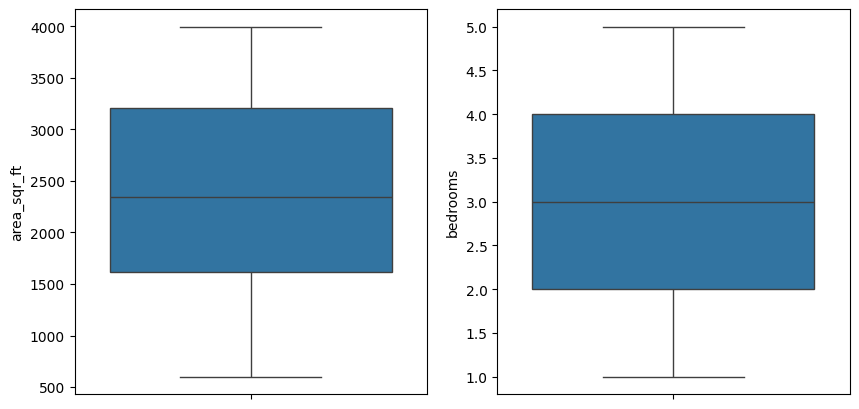

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['area_sqr_ft'])
plt.subplot(1,2,2)
sns.boxplot(df['bedrooms'])
plt.show()

#Create Model

In [30]:
X=df.drop('price_lakhs',axis=1)   #Input Data
y=df['price_lakhs']               #Output Data

#Split input,Output Data for training and testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)   #Divide data 80-20% for Testing and Training

In [52]:
x_train.head()

,area_sqr_ft,bedrooms
232,3599,3
59,841,4
6,2238,4
185,3329,5
173,3396,3


In [46]:
x_train.shape

(240, 2)

In [47]:
x_test.shape

(60, 2)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()   #Model Creation

In [56]:
lr.fit(x_train,y_train)    #Train Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
lr.coef_

array([ 0.05007921, 10.20027602])

In [37]:
lr.intercept_

np.float64(-1.862876744205181)

In [55]:
lr.predict([[3120,3]])

C:\Users\Vaishali Kanadje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([184.98508591])

#Check Accuracy of Model

In [38]:
from sklearn.metrics import r2_score

In [39]:
pred_test = lr.predict(x_test)        #Predict Output for Testing data

In [40]:
r2_score(y_test,pred_test)

0.9689466488379601

##The model achieved 96% accuracy, meaning it correctly predicts 96 out of 100 cases.